In [2]:
#Importing important Libraries which will be used for Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plt.style.use('ggplot')

In [3]:
train_data=pd.read_csv('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Loan Prediction/Data/cleaned_train.csv')

In [4]:
#Understanding loaded data
train_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [5]:
train_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,4128.978102,1359.425036,131.173802,342.569343,0.773723
std,1907.396960,1458.228533,51.648601,64.677492,0.418803
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2768.750000,0.000000,100.000000,360.000000,1.000000
50%,3656.000000,1293.500000,125.000000,360.000000,1.000000
75%,5000.000000,2250.000000,155.000000,360.000000,1.000000
max,10139.000000,5701.000000,376.000000,480.000000,1.000000


In [7]:
train_data.shape

(548, 13)

# Exploratory Data Analysis

We have 13 variable or attributes in our Loan Prediction Dataset. We will explore data on following questions:
1. What is gender distribution of loan applicants? What is marriage status?
2. How many of loan applicants are dependents?
3. What is education status of our loan applicants? How many are graduates? Loan approval of graduate and non-graduates?
4. How many of our applicants are Self-Employed? 
5. What is income distribution of loan applicants? How is loan approval dependent on applicant and co-applicant income?
6. What is Loan Amount distribution? How Loan amount dependent on employment status and annual income of loan applicants?
7. What is general loan amount term distribution?
8. Does applicant has credit history ? How many loan applicants without credit history got loan approval?
9. Where does loan applicant belongs to?

In [8]:
# Gender distribution on Loan applicants
gender_list=list(train_data.Gender.value_counts())

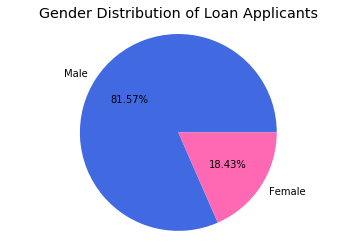

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(gender_list,labels=['Male','Female'],autopct='%1.2f%%',colors=['royalblue','hotpink'])
ax1.axis('equal')
ax1.set_title('Gender Distribution of Loan Applicants')
plt.show()

Nearly 82% of loan applicants are male and 18% of loan applicants are female

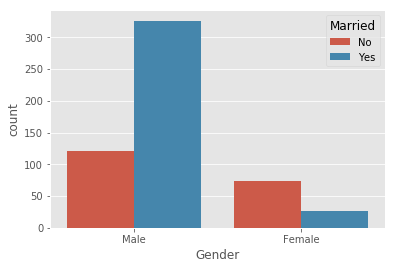

In [10]:
#Marriage status of Loan applicants
sns.countplot(x='Gender',hue='Married',data=train_data)

In [11]:
train_data.groupby('Gender')['Married'].value_counts().sum()

548

In [12]:
print('Married status of loan applicants: /n {}'.format(
    (train_data.groupby('Gender')['Married'].value_counts()/train_data.groupby('Gender')['Married'].count()*100)))

Married status of loan applicants: /n Gender  Married
Female  No         73.267327
        Yes        26.732673
Male    Yes        72.930649
        No         27.069351
Name: Married, dtype: float64


In [13]:
pd.pivot_table(train_data, values = 'Loan_Status', index = 'Gender',
               columns = 'Married',aggfunc ='count')

Married,No,Yes
Gender,,
Female,74,27
Male,121,326


Text(0,0.5,'Loan Status count')

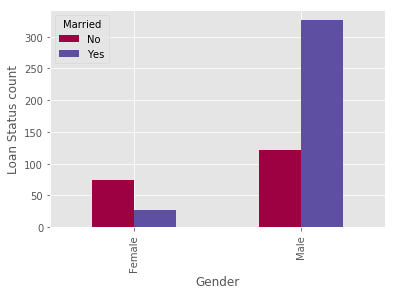

In [14]:
pd.pivot_table(train_data, values = 'Loan_Status', index = 'Gender',
               columns = 'Married',aggfunc ='count').plot.bar(colormap='Spectral')
plt.ylabel('Loan Status count')

***Observations:***
1. Number of Male applicants is more than female applicants.
2. Married men are more likely to get loan while unmarried female are more likely to get loan

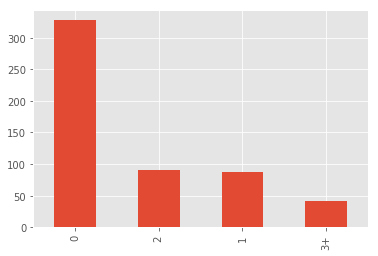

In [15]:
train_data.Dependents.value_counts().plot(kind='bar')

In [16]:
(train_data.Dependents.value_counts()/len(train_data.Dependents))*100

0     59.854015
2     16.605839
1     15.875912
3+     7.664234
Name: Dependents, dtype: float64

In [17]:
# Dependent wise Loan Approval
(train_data.groupby('Dependents')['Loan_Status'].value_counts()/train_data.groupby('Dependents')['Loan_Status'].count())*100

Dependents  Loan_Status
0           Y              68.902439
            N              31.097561
1           Y              66.666667
            N              33.333333
2           Y              73.626374
            N              26.373626
3+          Y              69.047619
            N              30.952381
Name: Loan_Status, dtype: float64

In [18]:
# Loan Approval percentage
(train_data.groupby('Dependents')['Loan_Status'].value_counts()/len(train_data.Dependents))*100

Dependents  Loan_Status
0           Y              41.240876
            N              18.613139
1           Y              10.583942
            N               5.291971
2           Y              12.226277
            N               4.379562
3+          Y               5.291971
            N               2.372263
Name: Loan_Status, dtype: float64

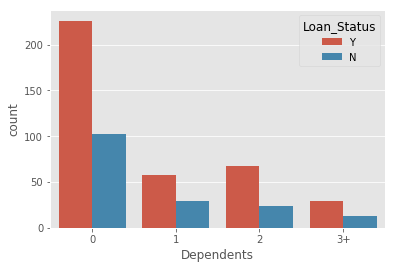

In [19]:
sns.countplot(x='Dependents',hue='Loan_Status',data=train_data)

In [20]:
train_data.groupby('Married').Dependents.value_counts()

Married  Dependents
No       0             162
         1              20
         2               8
         3+              5
Yes      0             166
         2              83
         1              67
         3+             37
Name: Dependents, dtype: int64

In [21]:
print('Percentage of Dependents as per marriage status : \n {}'.format(
(train_data.groupby('Married').Dependents.value_counts()/train_data.groupby('Married').Dependents.count())*100))

Percentage of Dependents as per marriage status : 
 Married  Dependents
No       0             83.076923
         1             10.256410
         2              4.102564
         3+             2.564103
Yes      0             47.025496
         2             23.512748
         1             18.980170
         3+            10.481586
Name: Dependents, dtype: float64


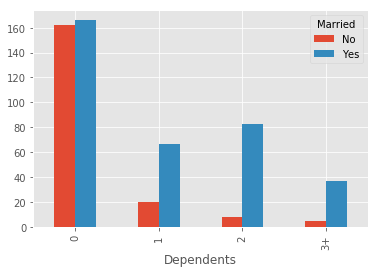

In [22]:
pd.pivot_table(train_data,index='Dependents',columns='Married',values='Loan_Status',aggfunc='count').plot.bar()

In [23]:
# Checking data in percentage terms
(train_data.groupby(['Dependents','Married'])['Loan_Status'].value_counts()/
train_data.groupby(['Dependents','Married'])['Loan_Status'].count())*100

Dependents  Married  Loan_Status
0           No       Y              65.432099
                     N              34.567901
            Yes      Y              72.289157
                     N              27.710843
1           No       Y              55.000000
                     N              45.000000
            Yes      Y              70.149254
                     N              29.850746
2           No       Y              62.500000
                     N              37.500000
            Yes      Y              74.698795
                     N              25.301205
3+          No       Y              80.000000
                     N              20.000000
            Yes      Y              67.567568
                     N              32.432432
Name: Loan_Status, dtype: float64

In [24]:
Dependents=train_data.Dependents.value_counts()

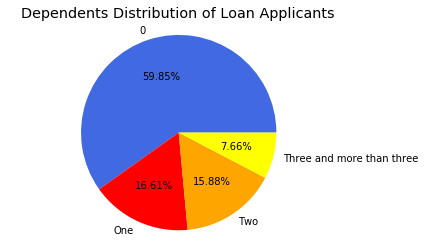

In [25]:
fig2, ax2 = plt.subplots()
ax2.pie(Dependents,labels=['0','One','Two','Three and more than three'],autopct='%1.2f%%',colors=['royalblue','red','orange','yellow'])
ax2.axis('equal')
ax2.set_title('Dependents Distribution of Loan Applicants')
plt.show()

***Observations:***
1. 60% of Loan applicants has no dependents.
2. Applicants with 0 dependents has high probability of getting loan.

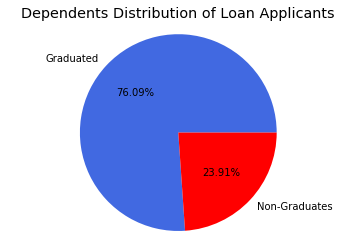

In [26]:
Education=train_data.Education.value_counts()
fig3, ax3 = plt.subplots()
ax3.pie(Education,labels=['Graduated','Non-Graduates'],autopct='%1.2f%%',colors=['royalblue','red'])
ax3.axis('equal')
ax3.set_title('Dependents Distribution of Loan Applicants')
plt.show()

In [27]:
train_data.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              301
              N              116
Not Graduate  Y               79
              N               52
Name: Loan_Status, dtype: int64

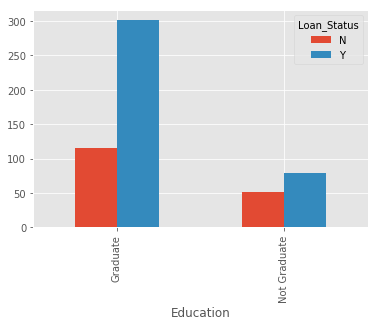

In [28]:
train_data.pivot_table(index='Education',columns='Loan_Status',values='Loan_ID',aggfunc='count').plot.bar()

In [29]:
(train_data.groupby(['Education','Loan_Status'])['Loan_ID'].count()/train_data.groupby('Education')['Education'].count())*100

Education     Loan_Status
Graduate      N              27.817746
              Y              72.182254
Not Graduate  N              39.694656
              Y              60.305344
dtype: float64

***Observation:***
1. 76% of Loan Applicants are graduates.
2. Out of approved Loan applicants 79% of applicants are graduates.
3. 72% of total graduate applicants got loan approval as compared to 60% of non-graduates applicants.
4. It means that education level does not have major impact on success rate of loan applications

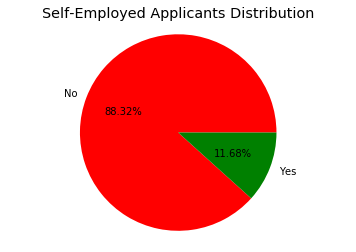

In [30]:
Self_Employed=train_data.Self_Employed.value_counts()
fig4, ax4 = plt.subplots()
ax4.pie(Self_Employed,labels=['No','Yes'],autopct='%1.2f%%',colors=['red','green'])
ax4.axis('equal')
ax4.set_title('Self-Employed Applicants Distribution')
plt.show()

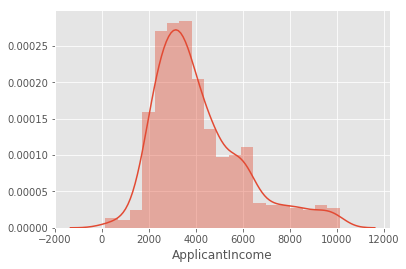

In [31]:
sns.distplot(train_data['ApplicantIncome'])

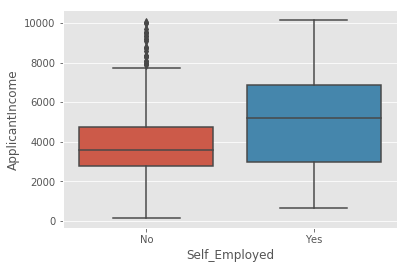

In [32]:
sns.boxplot(x='Self_Employed',y='ApplicantIncome',data=train_data)

In [33]:
train_data[train_data.Self_Employed=='No']['ApplicantIncome'].describe()

count      484.000000
mean      3993.386364
std       1788.089149
min        150.000000
25%       2761.750000
50%       3594.500000
75%       4755.750000
max      10047.000000
Name: ApplicantIncome, dtype: float64

In [34]:
train_data[train_data.Self_Employed=='Yes']['ApplicantIncome'].describe()

count       64.000000
mean      5154.390625
std       2422.135956
min        674.000000
25%       2973.750000
50%       5216.000000
75%       6854.000000
max      10139.000000
Name: ApplicantIncome, dtype: float64

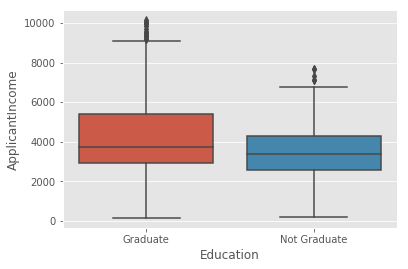

In [35]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train_data)

In [36]:
train_data[train_data.Education=='Graduate']['ApplicantIncome'].describe()

count      417.000000
mean      4303.628297
std       2001.709410
min        150.000000
25%       2935.000000
50%       3750.000000
75%       5417.000000
max      10139.000000
Name: ApplicantIncome, dtype: float64

In [37]:
train_data[train_data.Education=='Not Graduate']['ApplicantIncome'].describe()

count     131.000000
mean     3573.030534
std      1441.208830
min       210.000000
25%      2566.500000
50%      3357.000000
75%      4294.000000
max      7667.000000
Name: ApplicantIncome, dtype: float64

In [38]:
sns.countplot

<function seaborn.categorical.countplot>

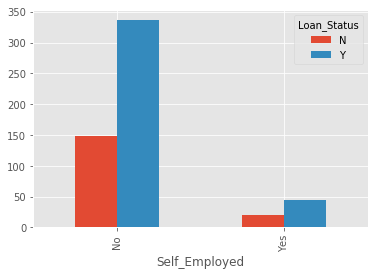

In [39]:
train_data.pivot_table(index='Self_Employed',columns='Loan_Status',values='Loan_ID',aggfunc='count').plot.bar()

***Observations:***
1. There is unequal distribution of self employed and working applicants.
2. Applicant Income of Self-Employed is on average 5000 dollars as compared to 4000 dollars for working
3. However, success of loan application has less dependency on employment status

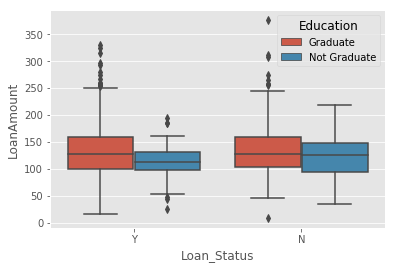

In [40]:
# Checking Loan Amount distribution according to Education Level
sns.boxplot(x='Loan_Status',y='LoanAmount',hue='Education',data=train_data)

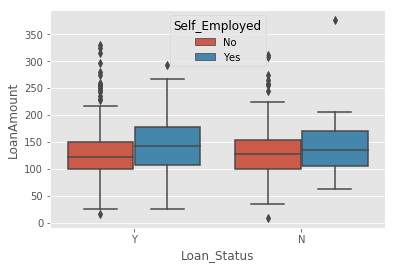

In [41]:
sns.boxplot(x='Loan_Status',y='LoanAmount',hue='Self_Employed',data=train_data)

In [42]:
train_data[(train_data.Self_Employed=='Yes')&(train_data.Loan_Status=='Y')]['LoanAmount'].describe()

count     44.000000
mean     146.382371
std       53.996534
min       25.000000
25%      107.000000
50%      142.500000
75%      177.000000
max      292.000000
Name: LoanAmount, dtype: float64

In [43]:
train_data[(train_data.Self_Employed=='No')&(train_data.Loan_Status=='Y')]['LoanAmount'].describe()

count    336.000000
mean     127.899694
std       49.672230
min       17.000000
25%      100.000000
50%      121.500000
75%      150.000000
max      330.000000
Name: LoanAmount, dtype: float64

In [44]:
train_data[(train_data.Self_Employed=='Yes')&(train_data.Loan_Status=='N')]['LoanAmount'].describe()

count     20.000000
mean     145.420608
std       68.484903
min       62.000000
25%      105.750000
50%      135.500000
75%      170.500000
max      376.000000
Name: LoanAmount, dtype: float64

In [45]:
train_data[(train_data.Self_Employed=='No')&(train_data.Loan_Status=='N')]['LoanAmount'].describe()

count    148.000000
mean     132.160199
std       52.173285
min        9.000000
25%      100.000000
50%      127.000000
75%      152.750000
max      311.000000
Name: LoanAmount, dtype: float64

Text(0,0.5,'Loan Amount in thousands')

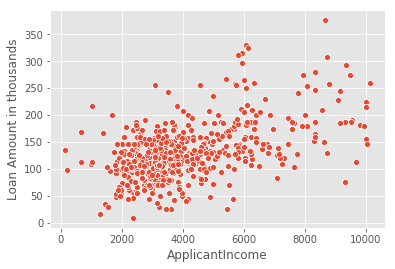

In [46]:
# Checking relationship between applicant income and LoanAmount
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=train_data)
plt.ylabel('Loan Amount in thousands')

Text(3.675,0.5,'LoanAmount in thousands')

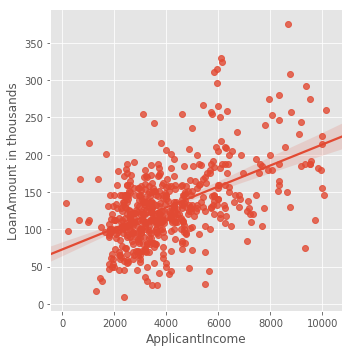

In [47]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=train_data)
plt.ylabel('LoanAmount in thousands')

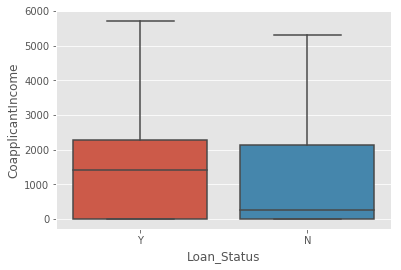

In [48]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train_data)

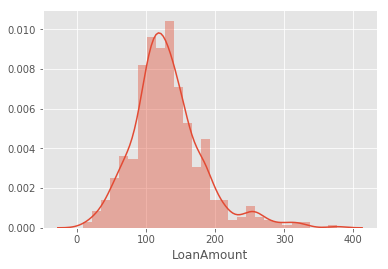

In [49]:
sns.distplot(train_data['LoanAmount'])

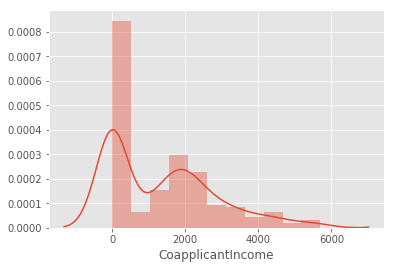

In [50]:
sns.distplot(train_data['CoapplicantIncome'])

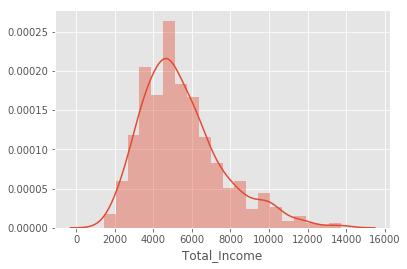

In [51]:
# Featuring Engineering for loan Applicants Income
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
sns.distplot(train_data['Total_Income'])

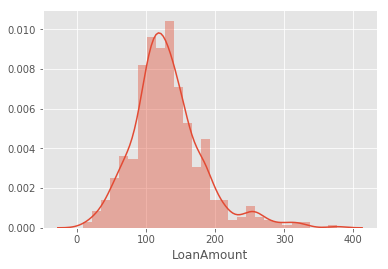

In [52]:
# Understanding distribution of Loan Amount
sns.distplot(train_data['LoanAmount'])

In [53]:
# credit history of Loan Applicant
train_data['Credit_History'].replace([0,1],['No','Yes'],inplace=True)

In [54]:
credit=list(train_data['Credit_History'].value_counts())


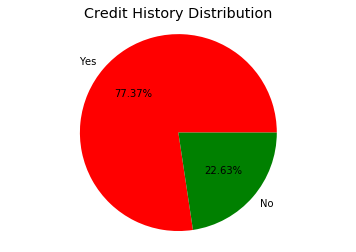

In [55]:
fig5, ax5 = plt.subplots()
ax5.pie(credit,labels=['Yes','No'],autopct='%1.2f%%',colors=['red','green'])
ax5.axis('equal')
ax5.set_title('Credit History Distribution')
plt.show()

In [56]:
train_data.pivot_table(index='Credit_History',columns='Loan_Status',values='Loan_ID',aggfunc='count')

Loan_Status,N,Y
Credit_History,,
No,85,39
Yes,83,341


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000278069A3CC0>,
      dtype=object)

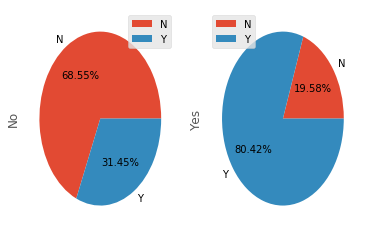

In [57]:
train_data.pivot_table(columns='Credit_History',index='Loan_Status',values='Loan_ID',aggfunc='count').plot.pie(subplots=True,autopct='%1.2f%%')

***Observations:***
1. Applicants with credit history has 80% success rate of approving loan as compared to 31% of Loan applicants without credit history

In [58]:
Area=train_data.Property_Area.value_counts()

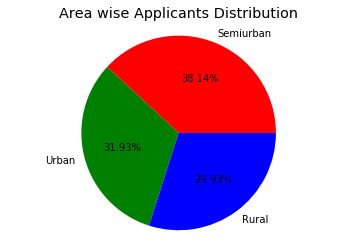

In [59]:
fig6, ax6 = plt.subplots()
ax6.pie(Area,labels=['Semiurban','Urban','Rural'],autopct='%1.2f%%',colors=['red','green','blue'])
ax6.axis('equal')
ax6.set_title('Area wise Applicants Distribution')
plt.show()

In [60]:
train_data.pivot_table(index='Property_Area',columns='Loan_Status',values='Loan_ID',aggfunc='count')

Loan_Status,N,Y
Property_Area,,
Rural,63,101
Semiurban,46,163
Urban,59,116


Text(0.5,1,'Area wise Loan Applicants Success rate')

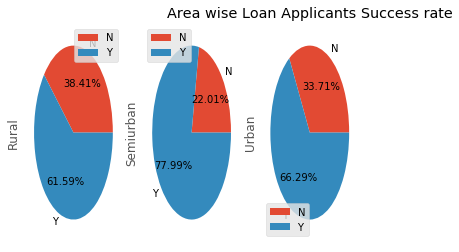

In [61]:
train_data.pivot_table(index='Loan_Status',columns='Property_Area',values='Loan_ID',aggfunc='count').plot.pie(subplots=True,autopct='%1.2f%%')
plt.title('Area wise Loan Applicants Success rate')

Text(0.5,1,'Area wise Loan Amount distribution')

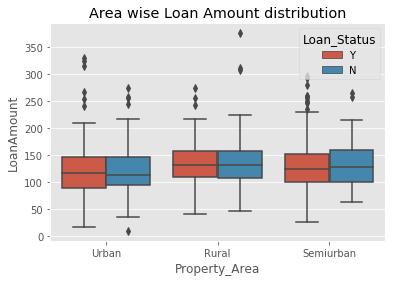

In [62]:
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Loan_Status',data=train_data)
plt.title('Area wise Loan Amount distribution')

Text(0.5,1,'Area wise Applicants distribution with Credit History')

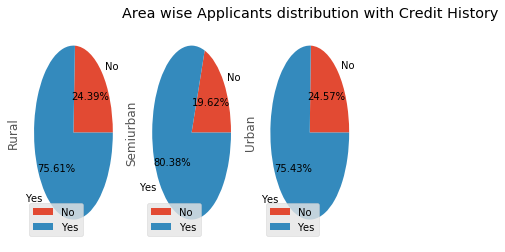

In [63]:
train_data.pivot_table(index='Credit_History',columns='Property_Area',values='Loan_ID',aggfunc='count').plot.pie(subplots=True,autopct='%1.2f%%')
plt.title('Area wise Applicants distribution with Credit History')

***Observation:***
1. Semi Urban residents has high success rate of approving loans as compared to Urban and Rural Areas.
2. Semi Urban Residents also have comparitively higher percentage with Credit History

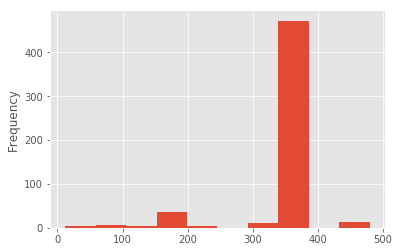

In [64]:
train_data.Loan_Amount_Term.plot.hist()

Text(0.5,1,'Area wise Loan Amount distribution')

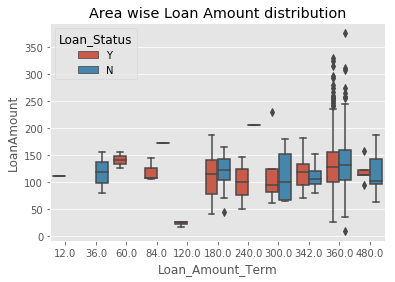

In [65]:
sns.boxplot(x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',data=train_data)
plt.title('Area wise Loan Amount distribution')